In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [6]:
# Try reading with ISO-8859-1 encoding
df = pd.read_csv('Data.csv', encoding='ISO-8859-1')

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
df.drop(['User_ID', 'Cust_name', 'Product_ID', 'Status', 'unnamed1'], axis=1, inplace=True)

In [11]:
df.dropna(subset=['Amount'], inplace=True)

In [12]:
df['Amount'] = df['Amount'].astype(int)

In [13]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            11239 non-null  object
 1   Age Group         11239 non-null  object
 2   Age               11239 non-null  int64 
 3   Marital_Status    11239 non-null  int64 
 4   State             11239 non-null  object
 5   Zone              11239 non-null  object
 6   Occupation        11239 non-null  object
 7   Product_Category  11239 non-null  object
 8   Orders            11239 non-null  int64 
 9   Amount            11239 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 965.9+ KB


Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
df.describe()

,Age,Marital_Status,Orders,Amount
count,11239.000000,11239.000000,11239.000000,11239.000000
mean,35.410357,0.420055,2.489634,9453.610553
std,12.753866,0.493589,1.114967,5222.355168
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,2.000000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12675.000000
max,92.000000,1.000000,4.000000,23952.000000


In [15]:
for col in df.columns:
    print(f"{col} unique values: {df[col].nunique()}")

Gender unique values: 2
Age Group unique values: 7
Age unique values: 81
Marital_Status unique values: 2
State unique values: 16
Zone unique values: 5
Occupation unique values: 15
Product_Category unique values: 18
Orders unique values: 4
Amount unique values: 6583


# Which gender has a higher purchasing power?

### Create a count plot for gender.

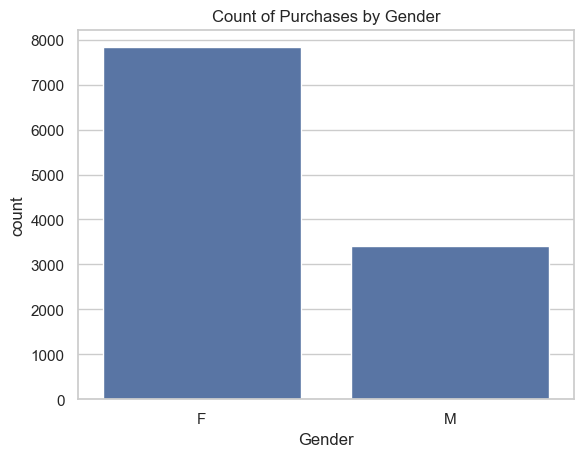

In [16]:
sns.countplot(data = df, x = 'Gender')
plt.title('Count of Purchases by Gender')
plt.show()

### Plot a bar chart to show the total purchase amount by gender.

In [17]:
gender_amount = df.groupby('Gender')['Amount'].sum().reset_index()

In [18]:
print(gender_amount)

  Gender    Amount
0      F  74335853
1      M  31913276


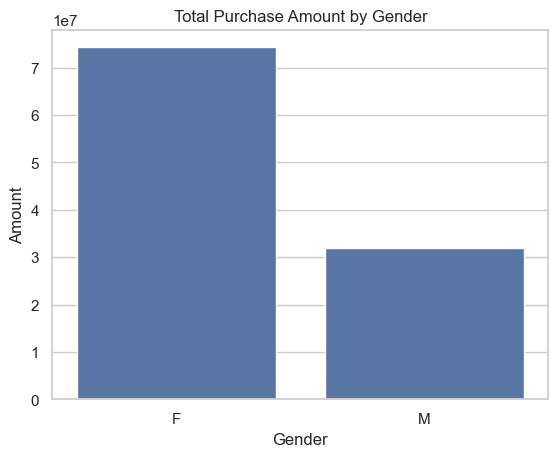

In [19]:
sns.barplot(data = gender_amount, x = 'Gender', y = 'Amount')
plt.title('Total Purchase Amount by Gender')
plt.show()

# Which age group has the most purchases, and is there a trend in purchasing power by age?

### Plot a count plot of age groups with hue as gender.

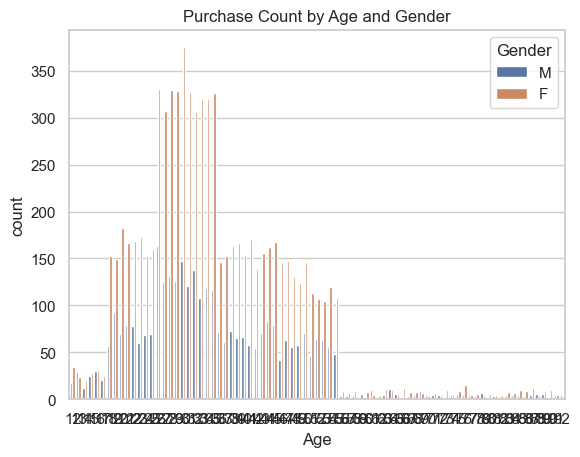

In [22]:
sns.countplot(data = df, x = 'Age', hue = 'Gender')
plt.title('Purchase Count by Age and Gender')
plt.show()

### Plot a bar chart showing total purchase amount by age group.

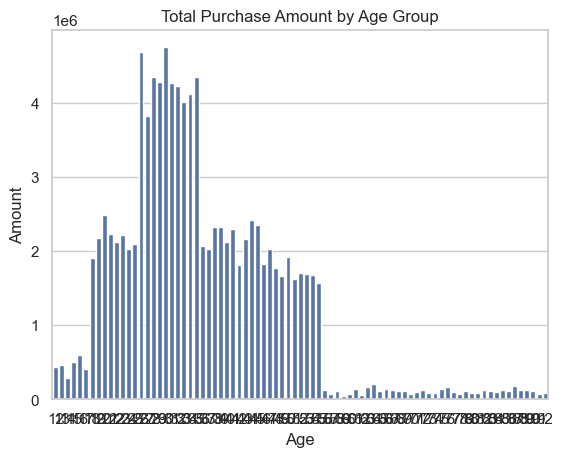

In [23]:
age_amount = df.groupby('Age')['Amount'].sum().reset_index()
sns.barplot(data = age_amount, x = 'Age', y = 'Amount')
plt.title('Total Purchase Amount by Age Group')
plt.show()

# Which states generate the highest number of orders and revenue?

### Plot bar charts for the number of orders and total amount by state, focusing on the top 10 states.

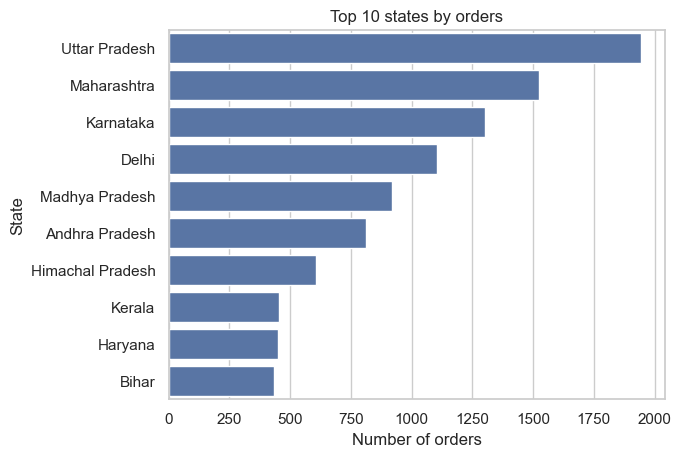

In [24]:
top_states_orders = df['State'].value_counts().head(10)
sns.barplot(x = top_states_orders.values, y = top_states_orders.index)
plt.title('Top 10 states by orders')
plt.xlabel('Number of orders')
plt.show()

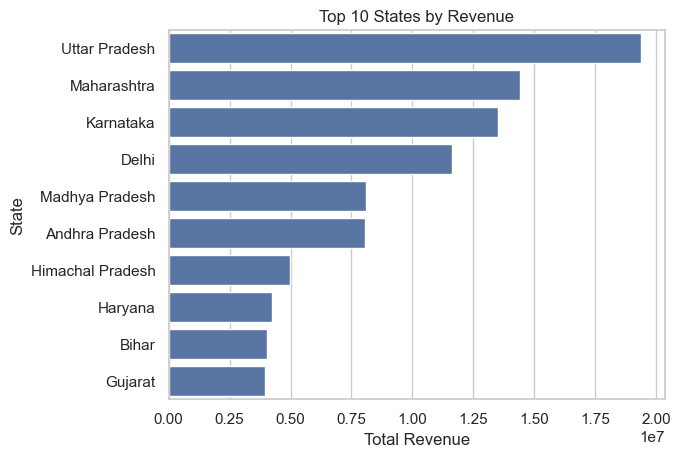

In [26]:
top_states_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x = top_states_amount.values, y = top_states_amount.index)
plt.title('Top 10 States by Revenue')
plt.xlabel('Total Revenue')
plt.show()